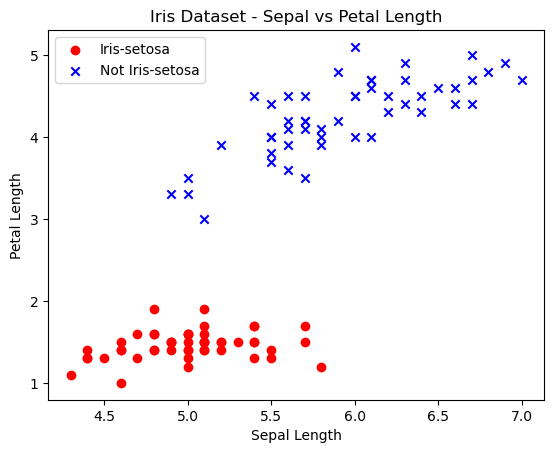

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Чтение данных
df = pd.read_csv('data.csv')
#df = df.iloc[np.random.permutation(len(df))]
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 1, -1)
X = df.iloc[0:100, [0, 2]].values

# Визуализация данных
plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='o', label='Iris-setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Not Iris-setosa')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - Sepal vs Petal Length')
plt.legend()
plt.show()

In [36]:
#w = np.zeros(1 + X.shape[1])

def train_err_check(X, y, search_err, max_iteration):
    iteration = 0
    w = np.random.randn(3)
    learn_rate = 0.001
    while (iteration<max_iteration):
        errors = 0
        for xi, target, j in zip(X, y, range(X.shape[0])):
            predict = np.where((np.dot(xi, w[1:]) + w[0]) >= 0.0, 1, -1)
            w[1:] += (learn_rate * (target - predict)) * xi
            w[1] += learn_rate * (target - predict)
            errors += int((target - predict) != 0)
        print([w])
        if errors == 0:
            print(f"Converged after {iteration} iterations.")
            break

        if errors < search_err:
            print(f"Converged with less than {search_err} errors after {iteration} iterations.")
            break

        iteration += 1

    # Count misclassifications
    predict = np.where(np.dot(X, w[1:]) + w[0] >= 0.0, 1, -1)
    misclassified = np.sum(predict-y)
    print(f"Errors: {errors}")
    print(f"Number of iterations: {iteration}")
    print(f"Number of misclassifications: {misclassified}")
    
    
train_err_check(X,y, 0.1, 1000)

[array([ 0.38792221,  0.77353509, -1.44602376])]
Converged after 0 iterations.
Errors: 0
Number of iterations: 0
Number of misclassifications: 0


In [44]:
def train_cycle_check(X, y, max_iteration, max_stale_iterations):
    w = np.random.randn(3)
    learn_rate = 0.001
    iteration = 0
    #prev_weights = np.copy(w)
    history = [w.copy]
    stale_iterations = 0
    while (iteration<max_iteration):
        errors = 0

        for xi, target, j in zip(X, y, range(X.shape[0])):
            predict = np.where((np.dot(xi, w[1:]) + w[0]) >= 0.0, 1, -1)
            w[1:] += (learn_rate * (target - predict)) * xi
            w[1] += learn_rate * (target - predict)
            errors += int((target - predict) != 0)
        # Check for cycling
       # if np.array_equal(w, prev_weights):
       #     stale_iterations += 1
       # else:
       #     stale_iterations = 0

       # if stale_iterations >= max_stale_iterations:
        #    print(f"Training stopped due to cycling after {iteration} iterations.")
        #    break
        if any(np.array_equal(w,prew_weight) for prew_weight in history):
            print(f"Training stopped due to cycling after {iteration} iterations.")
            break;
        
        history.append(w.copy())
       # prev_weights = np.copy(w)
        iteration += 1

    # Count misclassifications
    predictions = np.where(np.dot(X, w[1:]) + w[0] >= 0.0, 1, -1)
    misclassified = np.sum(predictions != y)
    print(f"Errors: {errors}")
    print(f"Number of iterations: {iteration}")
    print(f"Number of misclassifications: {misclassified}")
train_cycle_check(X,y, 100, 20)

Training stopped due to cycling after 31 iterations.
Errors: 0
Number of iterations: 31
Number of misclassifications: 0
